# ONE HOT ENCODER

# Importing Libraries & Uploading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv(r'C:\Users\WELCOME\Documents\Data Science\carprices.csv')
df

,Car Model,Mileage,Sell_Price,Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


# Plotting

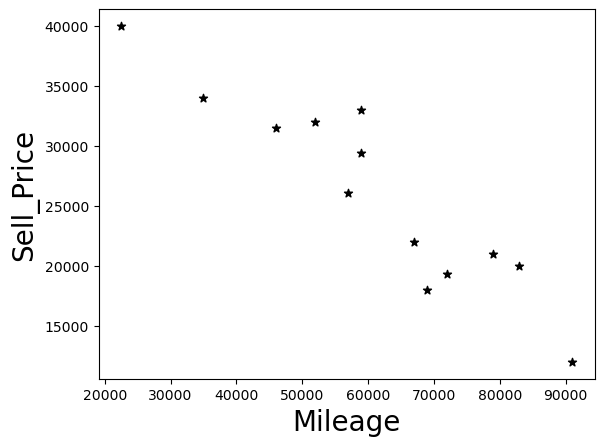

In [2]:

plt.xlabel('Mileage',fontsize=20)
plt.ylabel('Sell_Price',fontsize=20)
plt.scatter(df.Mileage,df.Sell_Price,color='black',marker='*')

# Preprocessing the Data

In [3]:
df.isna().sum()

Car Model     0
Mileage       0
Sell_Price    0
Age(yrs)      0
dtype: int64

# One Hot Encoding

In [4]:
df=pd.get_dummies(df,drop_first=True)
df=df.astype(int)
df.head()

,Mileage,Sell_Price,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0


# Splitting Independent & Dependent Variables

In [5]:
x=df.drop('Sell_Price',axis= 1)
x.head()

,Mileage,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0


In [6]:
y=df['Sell_Price']
y.head()

0    18000
1    34000
2    26100
3    40000
4    31500
Name: Sell_Price, dtype: int32

# Importing SPLIT Library

In [7]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=2)

# Importing LINEAR REGRESSION Model

In [8]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(train_x,train_y)
reg

LinearRegression()

# Train & Test Score

In [9]:
reg.score(train_x,train_y)

0.9424316605404253

In [10]:
reg.score(test_x,test_y)

0.9001236718716207

# Finding Coeffiecient & Intercept

In [11]:
reg.coef_

array([-5.38841682e-01,  7.65954830e+02, -3.48666518e+03,  2.69251267e+03])

In [12]:
reg.intercept_

54865.93992248063

# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

In [13]:
reg.predict([[4500,4,0,1]])

array([58197.48434705])

# 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

In [14]:
reg.predict([[86000,7,1,0]])

array([10400.57394156])

# 3) Score (accuracy) of the model

In [15]:
reg.score(x,y)

0.9357136866767946

# Pickle File Creation

In [16]:
import pickle
with open("Car_Price_Pickle_File.pkl","wb") as file:
    pickle.dump(reg,file)
print("Model saved to Car_Price_Pickle_File")

Model saved to Car_Price_Pickle_File
